In [97]:
import numpy as np
np.random.seed(1111)
import pandas as pd
import tensorflow as tf
tf.random.set_seed(1111)
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

In [98]:
file_paths = dict()
file_paths[0] = [
    "data/S11_parameter_data_for_zero_orientation.txt",
    "data/S12_parameter_data_for_zero_orientation.txt",
    "data/S21_parameter_data_for_zero_orientation.txt",
    "data/S22_parameter_data_for_zero_orientation.txt"]
file_paths[1] = [
    "data/S11_parameter_data_for_CW90_orientation.txt",
    "data/S12_parameter_data_for_CW90_orientation.txt",
    "data/S21_parameter_data_for_CW90_orientation.txt",
    "data/S22_parameter_data_for_CW90_orientation.txt"]
file_paths[2] = [
    "data/S11_parameter_data_for_CCW90_orientation.txt",
    "data/S12_parameter_data_for_CCW90_orientation.txt",
    "data/S21_parameter_data_for_CCW90_orientation.txt",
    "data/S22_parameter_data_for_CCW90_orientation.txt"]
file_paths[3] = [
    "data/S11_parameter_data_for_tilt_orientation.txt",
    "data/S12_parameter_data_for_tilt_orientation.txt",
    "data/S21_parameter_data_for_tilt_orientation.txt",
    "data/S22_parameter_data_for_tilt_orientation.txt"]
def process_file(file_path,orientation):
    datasets = []
    with open(file_path, 'r') as file:
        current_dataset = []
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{") + 1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
        if current_dataset:
            datasets.append(current_dataset)
    data = []
    for dataset in datasets:
        permittivity_values = dataset[0]
        df_data = dataset[1:]
        s_parameter_name = file_path.split("_parameter_data_for_")[0]
        df = pd.DataFrame(df_data, columns=["Frequency", f"{s_parameter_name}_Real", f"{s_parameter_name}_Imaginary"])
        df["Orientation"] = orientation
        for key, value in permittivity_values.items():
            if "er1" in key or "er11" in key:
                df[key] = value
        data.append(df)
    return data
all_combined_data = []
for index in file_paths:
    for file in file_paths[index]:
        combined_data = process_file(file,index)
        combined_data = pd.concat(combined_data, ignore_index=True)
        all_combined_data.append(combined_data)
array = []
group_size = 4
for i in range(0, len(all_combined_data), group_size):
    combined_dataframe = pd.concat(all_combined_data[i:i+group_size], axis=1)
    combined_dataframe.reset_index(drop=True, inplace=True)
    combined_dataframe = combined_dataframe.T.drop_duplicates().T
    array.append(combined_dataframe)
training_dataframe = pd.concat(array, axis=0)
training_dataframe.reset_index(drop=True, inplace=True)

In [99]:
training_dataframe

,Frequency,data/S11_Real,data/S11_Imaginary,Orientation,er1,er11,data/S12_Real,data/S12_Imaginary,data/S21_Real,data/S21_Imaginary,data/S22_Real,data/S22_Imaginary
0,1.0000000000000,0.010708443820477,-0.0015462124720216,0,2.2609046534204,0.04505415985025,0.21881759166718,0.96427410840988,0.21881757676601,0.96427404880524,0.010326976887882,-0.0032272436656058
1,1.0006999969482,0.010755277238786,-0.0017734571592882,0,2.2609046534204,0.04505415985025,0.23742462694645,0.96046137809753,0.23742462694645,0.96046137809753,0.010342826135457,-0.0034419626463205
2,1.0013999938965,0.010795198380947,-0.0020041132811457,0,2.2609046534204,0.04505415985025,0.25594717264175,0.95629823207855,0.25594717264175,0.95629817247391,0.010353058576584,-0.0036560846492648
3,1.0020999908447,0.010827971622348,-0.0022378272842616,0,2.2609046534204,0.04505415985025,0.27437824010849,0.95178383588791,0.27437821030617,0.95178377628326,0.010357595048845,-0.0038695030380040
4,1.0027999877930,0.010853389278054,-0.0024742297828197,0,2.2609046534204,0.04505415985025,0.29271024465561,0.94691836833954,0.29271024465561,0.94691836833954,0.010356365703046,-0.0040821037255228
...,...,...,...,...,...,...,...,...,...,...,...,...
400395,1.6971999406815,0.0086805028840899,0.022289762273431,3,6.9852127425897,0.058704470453142,-0.40560993552208,0.90874713659286,-0.40560990571976,0.90874713659286,0.022388560697436,-0.0084224054589868
400396,1.6979000568390,0.0089422538876534,0.022231062874198,3,6.9852127425897,0.058704470453142,-0.39663609862328,0.91266608238220,-0.39663606882095,0.91266602277756,0.022354153916240,-0.0086299376562238
400397,1.6986000537872,0.0092031918466091,0.022169157862663,3,6.9852127425897,0.058704470453142,-0.38762545585632,0.91649043560028,-0.38762545585632,0.91649043560028,0.022317390888929,-0.0088376719504595
400398,1.6993000507355,0.0094632459804416,0.022104114294052,3,6.9852127425897,0.058704470453142,-0.37857928872108,0.92022019624710,-0.37857925891876,0.92022013664246,0.022278273478150,-0.0090456288307905


In [100]:
file_paths = dict()
file_paths[0] = ["data/mea_rot_0.txt"]
file_paths[1] = ["data/mea_rot_cw90.txt"]
file_paths[2] = ["data/mea_rot_ccw90.txt"]
file_paths[3] = ["data/mea_rot_0_tilt.txt"]
# Function to process each file and merge datasets
def process_file(file_path,orientation):
    datasets = []
    with open(file_path, 'r') as file:
        current_dataset = []
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{") + 1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
        if current_dataset:
            datasets.append(current_dataset)
    dictionary = {
    0: "S11",
    1: "S21",
    2: "S12",
    3: "S22"
    }
    data = []
    for index, dataset in enumerate(datasets):
        permittivity_values = dataset[0]
        df_data = dataset[1:]
        s_parameter_name = dictionary[index]
        df = pd.DataFrame(df_data, columns=["Frequency", f"{s_parameter_name}_Real", f"{s_parameter_name}_Imaginary"])
        df["Orientation"] = orientation
        for key, value in permittivity_values.items():
            if "er1" in key or "er11" in key:
                df[key] = value
        data.append(df)
    return data
all_combined_data = []
for index in file_paths:
    for file in file_paths[index]:
        combined_data = process_file(file,index)
        all_combined_data.append(combined_data)
array = []
group_size = 4
for group in range(len(all_combined_data)):
    for i in range(0, len(all_combined_data[group]), group_size):
        combined_dataframe = pd.concat(all_combined_data[group][i:i+group_size], axis=1)
        combined_dataframe.reset_index(drop=True, inplace=True)
        combined_dataframe = combined_dataframe.T.drop_duplicates().T
        array.append(combined_dataframe)
testing_dataframe = pd.concat(array, axis=0)
testing_dataframe.reset_index(drop=True, inplace=True)

In [101]:
testing_dataframe

,Frequency,S11_Real,S11_Imaginary,Orientation,er1,er11,S21_Real,S21_Imaginary,S12_Real,S12_Imaginary,S22_Real,S22_Imaginary
0,1.0000000000000,-0.019713426000000,-0.0060391319000000,0,5,0.1,0.99841827000000,-0.021599129000000,0.99922335000000,-0.020864042000000,0.021094969000000,-0.0067798547000000
1,1.0007000000000,-0.019482541585540,-0.0063846667326036,0,5,0.1,0.99862961142762,-0.021390875332731,0.99871819006375,-0.020888964080002,0.020910906076745,-0.0072704463377855
2,1.0014000000000,-0.019137625649780,-0.0065910681665272,0,5,0.1,0.99844536227299,-0.021037567314369,0.99827064270063,-0.020941499353097,0.020691122020212,-0.0077301113670862
3,1.0021000000000,-0.018813112374285,-0.0069965346072957,0,5,0.1,0.99824771176501,-0.020766027366779,0.99820293745227,-0.020767770604437,0.020422204537027,-0.0081046434147131
4,1.0028000000000,-0.018616413134193,-0.0076122439176546,0,5,0.1,0.99826510603014,-0.020614971186886,0.99851990287783,-0.020519403197245,0.020163732147648,-0.0083827107262601
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,1.6972000000000,-0.011600339315836,-0.0022468552888657,3,5,0.1,0.99943889707617,-0.012551124992394,0.99941394067255,-0.011966879752902,0.011675129329758,-0.0025690063448839
4000,1.6979000000000,-0.011580232559659,-0.0023914196155704,3,5,0.1,0.99950177289091,-0.012453218030109,0.99948836387565,-0.012267111182474,0.011616661155427,-0.0027397168038479
4001,1.6986000000000,-0.011554945472181,-0.0025076094670767,3,5,0.1,0.99934808753521,-0.012272222581248,0.99969033205847,-0.012342750698088,0.011595997700361,-0.0028333870227771
4002,1.6993000000000,-0.011517901790077,-0.0025976429207074,3,5,0.1,0.99909245961084,-0.012164381634824,0.99979096587965,-0.012200160625934,0.011579854208092,-0.0028817326547755


In [102]:
training_dataframe.columns = ['Frequency', 'S11_Real', 'S11_Imaginary', 'Orientation', 'Permittivity_Real', 'Permittivity_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']
training_dataframe = training_dataframe[['Frequency', 'Orientation', 'Permittivity_Real', 'Permittivity_Imaginary','S11_Real', 'S11_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']]
testing_dataframe.columns = ['Frequency', 'S11_Real', 'S11_Imaginary', 'Orientation', 'Permittivity_Real', 'Permittivity_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']
testing_dataframe = testing_dataframe[['Frequency', 'Orientation',  'Permittivity_Real', 'Permittivity_Imaginary','S11_Real', 'S11_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']]

In [103]:
training_dataframe.head(5)

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000000000000,0,2.2609046534204,0.04505415985025,0.010708443820477,-0.0015462124720216,0.21881759166718,0.96427410840988,0.21881757676601,0.96427404880524,0.010326976887882,-0.0032272436656058
1,1.0006999969482,0,2.2609046534204,0.04505415985025,0.010755277238786,-0.0017734571592882,0.23742462694645,0.96046137809753,0.23742462694645,0.96046137809753,0.010342826135457,-0.0034419626463205
2,1.0013999938965,0,2.2609046534204,0.04505415985025,0.010795198380947,-0.0020041132811457,0.25594717264175,0.95629823207855,0.25594717264175,0.95629817247391,0.010353058576584,-0.0036560846492648
3,1.0020999908447,0,2.2609046534204,0.04505415985025,0.010827971622348,-0.0022378272842616,0.27437824010849,0.95178383588791,0.27437821030617,0.95178377628326,0.010357595048845,-0.0038695030380040
4,1.0027999877930,0,2.2609046534204,0.04505415985025,0.010853389278054,-0.0024742297828197,0.29271024465561,0.94691836833954,0.29271024465561,0.94691836833954,0.010356365703046,-0.0040821037255228


In [104]:
testing_dataframe.head(5)

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000000000000,0,5,0.1,-0.019713426000000,-0.0060391319000000,0.99841827000000,-0.021599129000000,0.99922335000000,-0.020864042000000,0.021094969000000,-0.0067798547000000
1,1.0007000000000,0,5,0.1,-0.019482541585540,-0.0063846667326036,0.99862961142762,-0.021390875332731,0.99871819006375,-0.020888964080002,0.020910906076745,-0.0072704463377855
2,1.0014000000000,0,5,0.1,-0.019137625649780,-0.0065910681665272,0.99844536227299,-0.021037567314369,0.99827064270063,-0.020941499353097,0.020691122020212,-0.0077301113670862
3,1.0021000000000,0,5,0.1,-0.018813112374285,-0.0069965346072957,0.99824771176501,-0.020766027366779,0.99820293745227,-0.020767770604437,0.020422204537027,-0.0081046434147131
4,1.0028000000000,0,5,0.1,-0.018616413134193,-0.0076122439176546,0.99826510603014,-0.020614971186886,0.99851990287783,-0.020519403197245,0.020163732147648,-0.0083827107262601


In [105]:
training_dataframe.dropna(inplace=True)
training_dataframe[training_dataframe.columns] = training_dataframe[training_dataframe.columns].apply(pd.to_numeric)
testing_dataframe.dropna(inplace=True)
testing_dataframe[testing_dataframe.columns] = testing_dataframe[testing_dataframe.columns].apply(pd.to_numeric)

In [106]:
training_dataframe.head(5)

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000,0,2.260905,0.045054,0.010708,-0.001546,0.218818,0.964274,0.218818,0.964274,0.010327,-0.003227
1,1.0007,0,2.260905,0.045054,0.010755,-0.001773,0.237425,0.960461,0.237425,0.960461,0.010343,-0.003442
2,1.0014,0,2.260905,0.045054,0.010795,-0.002004,0.255947,0.956298,0.255947,0.956298,0.010353,-0.003656
3,1.0021,0,2.260905,0.045054,0.010828,-0.002238,0.274378,0.951784,0.274378,0.951784,0.010358,-0.003870
4,1.0028,0,2.260905,0.045054,0.010853,-0.002474,0.292710,0.946918,0.292710,0.946918,0.010356,-0.004082


In [107]:
testing_dataframe.head(5)

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000,0,5,0.1,-0.019713,-0.006039,0.998418,-0.021599,0.999223,-0.020864,0.021095,-0.006780
1,1.0007,0,5,0.1,-0.019483,-0.006385,0.998630,-0.021391,0.998718,-0.020889,0.020911,-0.007270
2,1.0014,0,5,0.1,-0.019138,-0.006591,0.998445,-0.021038,0.998271,-0.020941,0.020691,-0.007730
3,1.0021,0,5,0.1,-0.018813,-0.006997,0.998248,-0.020766,0.998203,-0.020768,0.020422,-0.008105
4,1.0028,0,5,0.1,-0.018616,-0.007612,0.998265,-0.020615,0.998520,-0.020519,0.020164,-0.008383


In [108]:
bin_edges = np.arange(0.95, 1.85, 0.025)
training_dataframe["Frequency"] = pd.cut(training_dataframe["Frequency"], bins=bin_edges)
testing_dataframe["Frequency"] = pd.cut(testing_dataframe["Frequency"], bins=bin_edges)
training_dataframe = pd.get_dummies(training_dataframe, columns=["Frequency"], prefix="Frequency")
testing_dataframe = pd.get_dummies(testing_dataframe, columns=["Frequency"], prefix="Frequency")

In [109]:
training_dataframe['Orientation'] = training_dataframe['Orientation'].astype('category')
testing_dataframe['Orientation'] = testing_dataframe['Orientation'].astype('category')
training_dataframe = pd.get_dummies(training_dataframe, columns=['Orientation'])
testing_dataframe = pd.get_dummies(testing_dataframe, columns=['Orientation'])

In [110]:
columns = []
for column in training_dataframe.columns:
    if column != "Permittivity_Real" and column !="Permittivity_Imaginary" and column != "Frequency":
        columns.append(column)
columns

['S11_Real',
 'S11_Imaginary',
 'S12_Real',
 'S12_Imaginary',
 'S21_Real',
 'S21_Imaginary',
 'S22_Real',
 'S22_Imaginary',
 'Frequency_(0.95, 0.975]',
 'Frequency_(0.975, 1.0]',
 'Frequency_(1.0, 1.025]',
 'Frequency_(1.025, 1.05]',
 'Frequency_(1.05, 1.075]',
 'Frequency_(1.075, 1.1]',
 'Frequency_(1.1, 1.125]',
 'Frequency_(1.125, 1.15]',
 'Frequency_(1.15, 1.175]',
 'Frequency_(1.175, 1.2]',
 'Frequency_(1.2, 1.225]',
 'Frequency_(1.225, 1.25]',
 'Frequency_(1.25, 1.275]',
 'Frequency_(1.275, 1.3]',
 'Frequency_(1.3, 1.325]',
 'Frequency_(1.325, 1.35]',
 'Frequency_(1.35, 1.375]',
 'Frequency_(1.375, 1.4]',
 'Frequency_(1.4, 1.425]',
 'Frequency_(1.425, 1.45]',
 'Frequency_(1.45, 1.475]',
 'Frequency_(1.475, 1.5]',
 'Frequency_(1.5, 1.525]',
 'Frequency_(1.525, 1.55]',
 'Frequency_(1.55, 1.575]',
 'Frequency_(1.575, 1.6]',
 'Frequency_(1.6, 1.625]',
 'Frequency_(1.625, 1.65]',
 'Frequency_(1.65, 1.675]',
 'Frequency_(1.675, 1.7]',
 'Frequency_(1.7, 1.725]',
 'Frequency_(1.725, 1.75

In [111]:
#scalar_columns = ['Permittivity_Real','Permittivity_Imaginary','S11_Real','S11_Imaginary','S12_Real','S12_Imaginary','S21_Real','S21_Imaginary','S22_Real','S22_Imaginary']

In [112]:
testing_dataframe['Permittivity_Imaginary'][testing_dataframe['Permittivity_Imaginary'] == 0.4] = 0.1

/var/folders/lk/g6q_4n912156v7109ds7l5mm0000gn/T/ipykernel_17981/3803056219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_dataframe['Permittivity_Imaginary'][testing_dataframe['Permittivity_Imaginary'] == 0.4] = 0.1


In [113]:
#from sklearn.preprocessing import MinMaxScaler
#X_norm = MinMaxScaler().fit(training_dataframe[scalar_columns])
#training_dataframe[scalar_columns] = X_norm.transform(training_dataframe[scalar_columns])
#testing_dataframe[scalar_columns] = X_norm.transform(testing_dataframe[scalar_columns])

In [114]:
X_train = training_dataframe[columns].values
y_train = training_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values
indices = np.random.permutation(len(training_dataframe))
X = X_train[indices]
y = y_train[indices]
split_point = int(0.80 * len(X))
X_train = X[:split_point]
y_train = y[:split_point]
X_val = X[split_point:]
y_val = y[split_point:]
X_test = testing_dataframe[columns].values
y_test = testing_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values
y_test[y_test == 0.4] = 0.1
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_val = X_val.astype(float)
y_val = y_val.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               6144      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 2)                 34        
                                                                 
Total params: 17042 (66.57 KB)
Trainable params: 17042 (66.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
33/33 

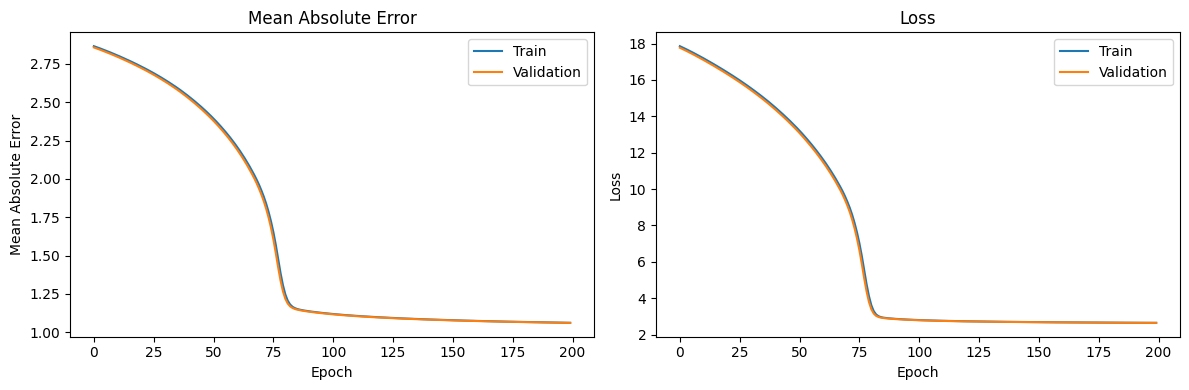

In [115]:
def mae_loss(y_true, y_pred):
    y_true_real, y_true_imag = tf.split(y_true, 2, axis=-1)
    y_pred_real, y_pred_imag = tf.split(y_pred, 2, axis=-1)
    squared_loss_real = tf.losses.mean_squared_error(y_true_real, y_pred_real)
    squared_loss_imag = tf.losses.mean_squared_error(y_true_imag, y_pred_imag)
    return 0.5 * squared_loss_real + 0.5 * squared_loss_imag
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(y_train.shape[1], activation='linear')
])


model.compile(optimizer=tf.optimizers.Adadelta(learning_rate=0.001),
              loss=[mae_loss],
              metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanSquaredError()])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=10000,shuffle=True)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

126/126 [==============================] - 0s 659us/step


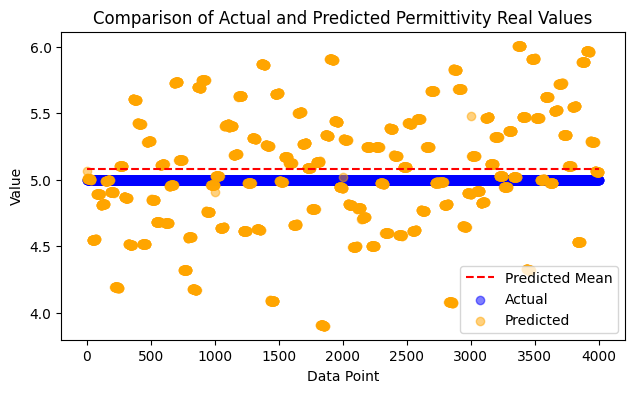

In [116]:
y_pred = model.predict(X_test)
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y_test) - 1], [np.mean(y_pred[:, 0]), np.mean(y_pred[:, 0])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y_test)), y_test[:, 0], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred[:, 0], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

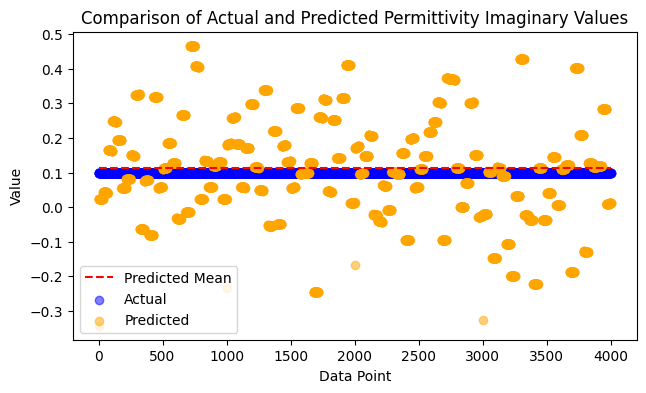

In [117]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y_test) - 1], [np.mean(y_pred[:, 1]), np.mean(y_pred[:, 1])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y_test)), y_test[:, 1], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred[:, 1], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Imaginary Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

In [118]:
X_train = training_dataframe[columns].values
y_train = training_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values
X_train = X_train.astype(float)
y_train = y_train.astype(float)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               6144      
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dense_49 (Dense)            (None, 2)                 34        
                                                                 
Total params: 17042 (66.57 KB)
Trainable params: 17042 (66.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
41/41 

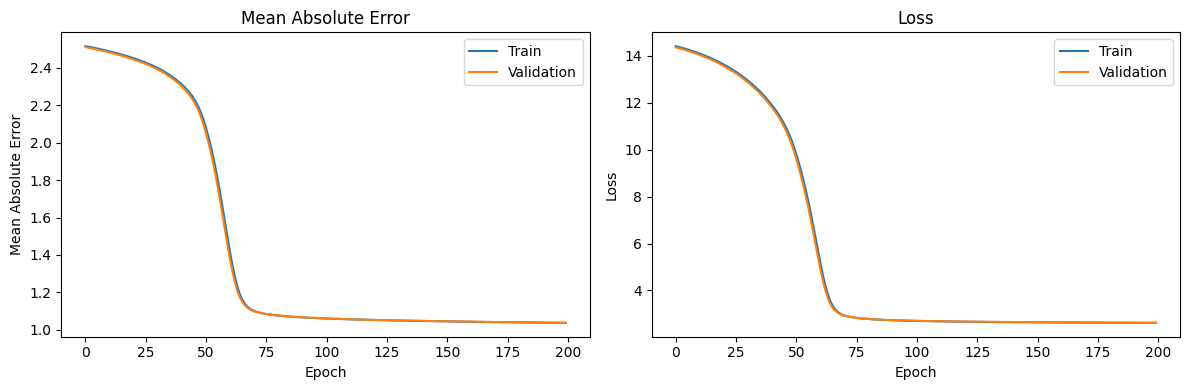

In [119]:
def mae_loss(y_true, y_pred):
    y_true_real, y_true_imag = tf.split(y_true, 2, axis=-1)
    y_pred_real, y_pred_imag = tf.split(y_pred, 2, axis=-1)
    squared_loss_real = tf.losses.mean_squared_error(y_true_real, y_pred_real)
    squared_loss_imag = tf.losses.mean_squared_error(y_true_imag, y_pred_imag)
    return 0.5 * squared_loss_real + 0.5 * squared_loss_imag
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    keras.layers.Dense(y_train.shape[1], activation='linear')
])


model.compile(optimizer=tf.optimizers.Adadelta(learning_rate=0.001),
              loss=[mae_loss],
              metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanSquaredError()])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=10000,shuffle=True)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

126/126 [==============================] - 0s 654us/step


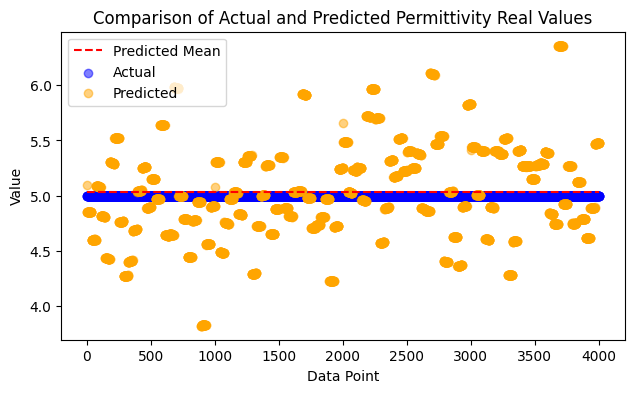

In [120]:
y_pred = model.predict(X_test)
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y_test) - 1], [np.mean(y_pred[:, 0]), np.mean(y_pred[:, 0])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y_test)), y_test[:, 0], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred[:, 0], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

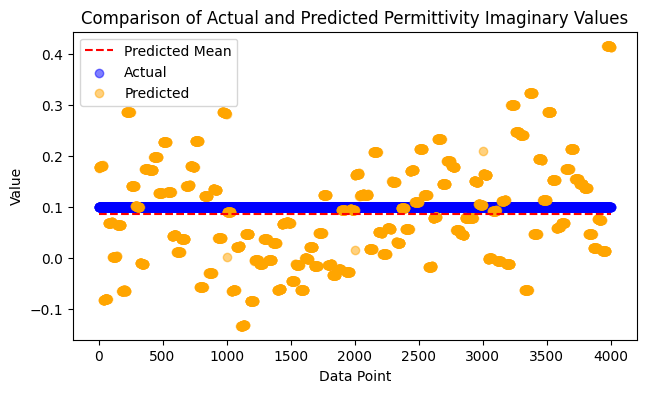

In [121]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y_test) - 1], [np.mean(y_pred[:, 1]), np.mean(y_pred[:, 1])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y_test)), y_test[:, 1], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred[:, 1], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Imaginary Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()